# Belastingen uit matroos

#  importeer de benodigde functies

In [1]:
from pathlib import Path


## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_fews_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    BelastingWaterwebservicesRWS:
        MISSING_VALUE: 999999999.0 

DataAdapter: 
    locaties: 
        type: csv
        path: "belastingen_rws.csv"
    waterstanden: 
        type: csv
        path: "waterstanden.csv"
...

```

In [2]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "belasting_matroos_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [3]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [4]:
from toolbox_continu_inzicht.belastingen import BelastingMatroos

matroos = BelastingMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [5]:
matroos.df_in

In [6]:
ds = await matroos.run()

In [9]:
df = matroos.df_out

In [15]:
df_plot = df[df["objectid"] == "hoekvanholland"]

In [21]:
df_plot

,objectid,objecttype,parameterid,datetime,value,calculating,measurementcode
datetime,,,,,,,
2024-10-17 15:00:00+00:00,hoekvanholland,measuringstation,1,1.729177e+12,1.00,True,observed
2024-10-17 15:10:00+00:00,hoekvanholland,measuringstation,1,1.729178e+12,0.94,True,observed
2024-10-17 15:20:00+00:00,hoekvanholland,measuringstation,1,1.729178e+12,0.86,True,observed
2024-10-17 15:30:00+00:00,hoekvanholland,measuringstation,1,1.729179e+12,0.76,True,observed
2024-10-17 15:40:00+00:00,hoekvanholland,measuringstation,1,1.729180e+12,0.66,True,observed
...,...,...,...,...,...,...,...
2024-10-18 14:20:00+00:00,hoekvanholland,measuringstation,1,1.729261e+12,1.41,True,observed
2024-10-18 14:30:00+00:00,hoekvanholland,measuringstation,1,1.729262e+12,1.34,True,observed
2024-10-18 14:40:00+00:00,hoekvanholland,measuringstation,1,1.729262e+12,1.26,True,observed


In [17]:
from toolbox_continu_inzicht.utils.datetime_functions import datetime_from_epoch

df_plot = df_plot.set_index(df_plot["datetime"].apply(lambda x: datetime_from_epoch(x)))

<Axes: xlabel='datetime'>

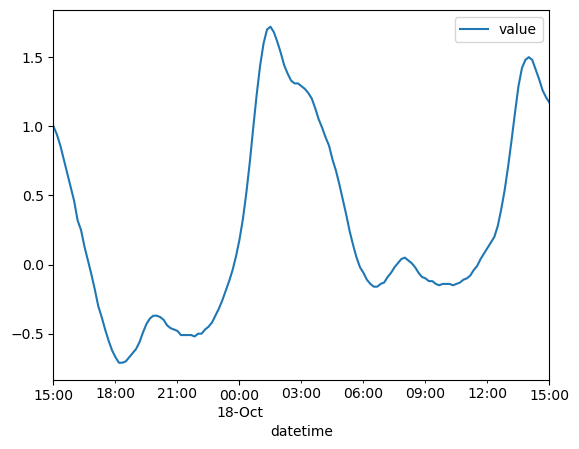

In [19]:
df_plot[["value"]].plot()